#### Importação de libs

In [1]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 6

# Modelagem

### Quais as variáveis de decisão?

####`x1`=> Quantidade de produtos de P1
####`x2`=> Quantidade de produtos de P1

### Qual a função objetivo?
#### Maximizar Lucro

*   Lucro de `x1 = 120`
*   Lucro de `x2 = 150`




In [2]:
@latexify.with_latex
def maxLucro(x1, x2):
  return 120*x1 + 150*x2
maxLucro 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7fe514a28a50>

### Quais as restrições?

#### Restrições tecnicas e Restrições de negatividade

In [3]:
@latexify.with_latex
def restricoes(x1, x2):
  if 1:
    return ((2*x1 + 4*x2) <= 100)
  elif 2:
    return (3*x1 + 2*x2 <= 90)
  elif 3:
    return (5*x1 + 3*x2 <= 120) 
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7fe514a3b2d0>

Observação: `if n` foi usado para indicar que é uma restrição, sendo `if` neste foi usado para indicar qual a restrição e `n` para indica a restrição.
O `otherwise` está sendo usado para indicar restrição de não negatividade
####**Restrições** 


*   Restrição de R1 => `if 1`
*   Restrição de R2 => `if 2`
*   Restrição de R3 => `if 3`
*   Restrição de não negatividade => `otherwise`



#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição 2x1 + 4x2 = 100

Quando x1=0 então x2=?

2(0) + 4x2 = 100

4x2 = 100

x2=100/4=25

Quando x2=0 então x1=?

2x1+4(0)=100

2x1=100
x1=100/2=50


#### Restrição 3x1 + 2x2 = 90

Quando x1=0 então x2=?
3(0) + 2x2 = 90

2x2 = 90
x2=90/2=45

Quando x2=0 então x1=?

3x1 +2(0) = 90
3x1=90

x1=90/3=30


#### Restrição 5x1+3x2=120

Quando x1=0 então x2=?
5(0) + 3x2 = 120
3x2=120
x2=120/3=40

Quando x2=0 então x1=?

5x1 +3(0) =120

5x1=120
x1=120/5=24


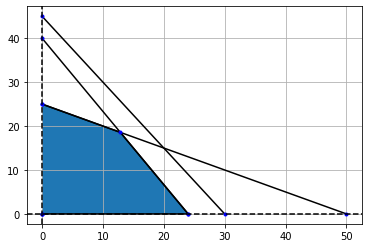

In [4]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, 50], [25, 0]])
list_values.append([[0, 30], [45, 0]])
list_values.append([[0, 24], [40, 0]])

area_de_solucao = [[0, 24, 12.86, 0], [0, 0, 18.57, 25]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


#plt.legend(['Reta 0'], loc=9)

plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()

# Programação

In [5]:
# Definir o modelo
model = pulp.LpProblem('Lista 1 - Exercicio 6', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(2*x[1] + 4*x[2] <= 100, name='restricao_1')
model.addConstraint(3*x[1] + 2*x[2] <= 90, name='restricao_2')
model.addConstraint(5*x[1] + 3*x[2] <= 120, name='restricao_3')

# Função Objetivo
model.setObjective(120*x[1] + 150*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 120*x_sol[1] + 150*x_sol[2]
print(f'z = {z}')

x = {1: 12.857143, 2: 18.571429}
z = 4328.57151


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
